# Project summary

To be filled out later

# Data import and cleaning

## Importing libraries and seperating DataFrames

We begin be importing the libraries.

In [1]:
#Importing external libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

#Importing classes and functions from external files:
from model_classes import ModelSwitcher, DataPreprocessor
from cleaning_functions import *

#Configuring options
%matplotlib inline
pd.set_option('display.max_columns', 50)

/home/corey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_outcomes = pd.read_csv("DATASETS/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
test_set = pd.read_csv("DATASETS/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
df = pd.read_csv("DATASETS/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
target_col = "status_group"

Merging the test set with the set for evaluation before data cleaning optimizes the process by having the full scope of the values from the start.

In [3]:
df_clean_test = pd.concat([df,test_set], axis=0).copy()

Created a seperate dataframe for EDA which combines the training set and their respective values.

In [4]:
df_j = pd.merge(df, df_outcomes, how="left", on="id")

In [5]:
def dummy_creation():
    pass


    
def main_data_cleaning(df):
    df = simp_datetime_map(df, "date_recorded")
#     df = imputer(df, "construction_year", year_fill, 0)
    return df

## Dealing with missing data

I stored parameters for the imputer functions to process all all of the missing data within OrderedDicts which will be fitted/transformed in bulk through the use of loops. The functtions also create a dummy variable for each indicating that the data was from a missing source within this process to preserve as much information as possible.

In [12]:
impute_dict = OrderedDict([("construction_year",[0, "median", None])])

In [7]:
df_c = main_data_cleaning(df_clean_test)

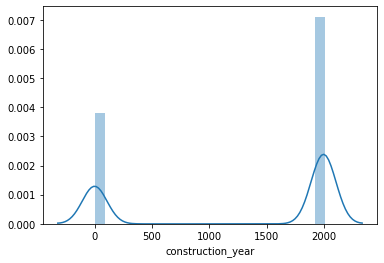

In [8]:
sns.distplot(df_c["construction_year"])

In [10]:
df_j["region_code"].unique()

array([11, 20, 21, 90, 18,  4, 17, 14, 60, 10,  3, 15, 19, 16, 80,  1,  6,
        2, 12, 13,  5,  7, 99, 24,  9,  8, 40])

In [12]:
for i in df_j["region_code"].unique():
    print(i, df_j[df_j["region_code"] == i]["region"].unique())
# df["region"].unique().shape
# df["region_code"].unique().shape


11 ['Iringa' 'Shinyanga']
20 ['Mara']
21 ['Manyara']
90 ['Mtwara']
18 ['Kagera' 'Lindi']
4 ['Tanga']
17 ['Shinyanga' 'Mwanza']
14 ['Tabora' 'Shinyanga']
60 ['Pwani']
10 ['Ruvuma']
3 ['Kilimanjaro']
15 ['Rukwa']
19 ['Mwanza']
16 ['Kigoma']
80 ['Lindi']
1 ['Dodoma']
6 ['Pwani']
2 ['Arusha']
12 ['Mbeya']
13 ['Singida']
5 ['Morogoro' 'Tanga']
7 ['Dar es Salaam']
99 ['Mtwara']
24 ['Arusha']
9 ['Mtwara']
8 ['Lindi']
40 ['Pwani']


In [32]:
df_c["construction_year"].unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

In [9]:

imputes = get_imputer_objs(df_c, impute_dict)
df_c = impute_vals(df_c, impute_dict, imputes)
# df_c["construction_year"].ravel()

In [11]:
df_c

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,missing_construction_year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,2000.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988.0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994.0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,0
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009.0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,0


In [ ]:
df["amount_tsh"].unique()

In [ ]:
df.info()

# EDA

In [ ]:
cat_cols = ["quality_group"]
df_j.quality_group.unique()
sns.distplot(target_col, labels=cat_cols)

In [ ]:
missing_dummies = extract_column_names(df_c, "^missing_")
cat_cols = ["date_recorded", "funder", "installer", "wpt_name"]
cont_features = df_j.columns.drop(labels=[target_col, *cat_cols])
cont_features = ["gps_height", "longitude"]

In [ ]:
data = DataPreprocessor(df_j, target_col, cont_features=cont_features, scale_type="minmax", poly_degree=2)

In [ ]:
model = ModelSwitcher(data, duplicate=True)

In [ ]:
model.data.poly_degree = 1
model.data._poly_features()
model.data.X